In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
def load_data(fname):
    with open(fname, 'r') as f:
        names = f.readline().strip().split(',') # header
        rows = [list(map(float, row.strip().split(','))) for row in f.readlines()]
    arr = np.array(rows)
    data = {}
    for i in range(len(names)):
        data[names[i]] = arr[:,i]
    return data

In [33]:
def standard(col, clip=0):
#     return (col - col.min())/(col.max() - col.min())
    return col[clip:]/col[clip:].max()

In [28]:
fname = 'logs/slips_frics_10-24-13.57'
data = load_data(fname)
print(names, data['t'].shape)

['t', 'v', 'vx', 'vy', 'a', 'psi', 'dpsi', 'delta', 's1', 's2', 's3', 's4', 'f1', 'f2', 'f3', 'f4'] (317,)


In [121]:
v = data['v']
psi = data['psi']
dpsi = data['dpsi']
vx = data['vx']
vy = data['vy']
a = data['a']
delta = data['delta']
lr = 1.27
lf = 1.6
beta = np.arctan(.5*np.tan(delta))

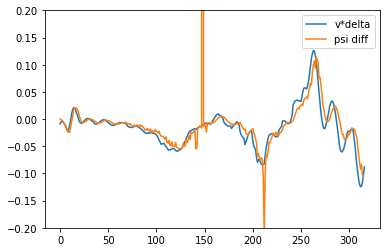

In [81]:
plt.plot(v*np.sin(beta)*.1/2.67, label='v*delta')
plt.plot(-np.diff(psi), label='psi diff')
# plt.plot(dpsi*.1, label='dpsi')
plt.ylim([-.2, .2])
plt.legend()

(315, 1) (315, 1)
[[-22.64256901]]


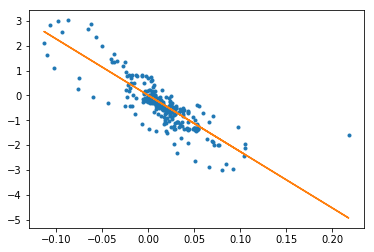

In [165]:
from sklearn import linear_model

# reg = linear_model.Lasso(alpha=1e-5, fit_intercept=False)
# reg.fit(x, y)
# print(reg.coef_)

diffs = np.diff(psi)
keep = np.abs(diffs - diffs.mean()) < 2.5 * diffs.std()
x = diffs[keep,None]
y = (v[1:] * np.sin(beta[1:]))[keep,None]
print(x.shape, y.shape)
w = x.T.dot(y)/x.T.dot(x)
print(w)

plt.plot(x, y, '.')
plt.plot(x, w*x);

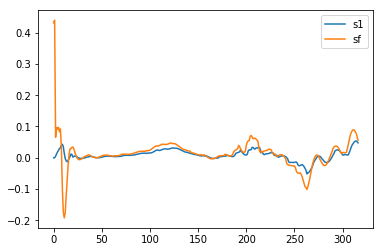

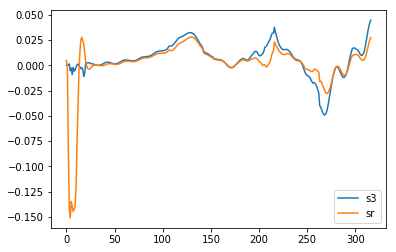

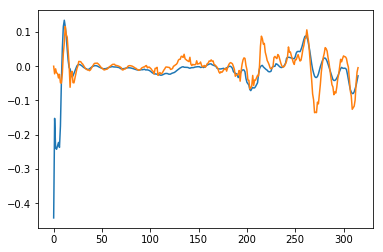

In [152]:
sf = np.arctan((vy + lf*dpsi)/vx) - delta
sr = np.arctan((vy - lf*dpsi)/vx)
ddpsi = np.diff(dpsi)
sd = sr[1:] - sf[1:]

plt.plot(data['s1'], label='s1')
plt.plot(sf, label='sf')
# plt.plot(data['s3'], label='s3')
# plt.plot(data['s4'], label='s4')
plt.legend();

plt.figure();
plt.plot(data['s3'], label='s3')
plt.plot(sr, label='sr')
plt.legend();

plt.figure()
plt.plot(sd);
plt.plot(ddpsi);

[[0.53923286]]


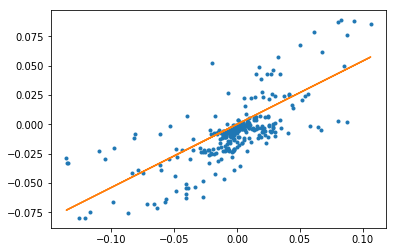

In [164]:
keep = np.abs(sd - sd.mean()) < 2.5 * sd.std()
x = ddpsi[keep,None]
y = sd[keep,None]

plt.plot(x, y, '.')
w = (x.T.dot(y))/(x.T.dot(x))
plt.plot(x, w * x)
print(w)

# reg = linear_model.Lasso(alpha=1e-10);
# reg.fit(x, y);
# preds = reg.predict(x)
# plt.plot(x, preds)
# print(reg.coef_)

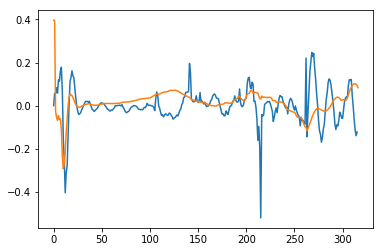

In [179]:
dvy = np.diff(vy)
plt.plot(-dvy);
# plt.plot(-dpsi*vx)
plt.plot((sf*np.cos(delta) + sr));